In [38]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import cv2
import numpy as np

# Preparing Data

In [39]:
TRAINING_DIR = "./Dataset/train"
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
VALIDATION_DIR = "./Dataset/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


# Defining Model architecture

In [40]:
model = Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

In [41]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 100)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 129600)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)               

In [42]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=1,save_best_only=True,mode='auto')

# Training the Model

In [43]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Epoch 1/5
132/132 [==============================] - 89s 677ms/step - loss: 0.8437 - acc: 0.7087 - val_loss: 1.4951 - val_acc: 0.8608

Epoch 00001: val_loss improved from inf to 1.49505, saving model to model-001.model
Epoch 2/5
132/132 [==============================] - 91s 690ms/step - loss: 0.3924 - acc: 0.8494 - val_loss: 0.0951 - val_acc: 0.9278

Epoch 00002: val_loss improved from 1.49505 to 0.09509, saving model to model-002.model
Epoch 3/5
132/132 [==============================] - 91s 692ms/step - loss: 0.3318 - acc: 0.8905 - val_loss: 0.0163 - val_acc: 0.9072

Epoch 00003: val_loss improved from 0.09509 to 0.01635, saving model to model-003.model
Epoch 4/5
132/132 [==============================] - 94s 713ms/step - loss: 0.3045 - acc: 0.8913 - val_loss: 0.0344 - val_acc: 0.9691

Epoch 00004: val_loss did not improve from 0.01635
Epoch 5/5
132/132 [==============================] - 96s 728ms/step - loss: 0.3425 - acc: 0.8875 - val_loss: 0.0016 - val_acc: 0.9639

Epoch 00005: v

# Plotting Results of Training

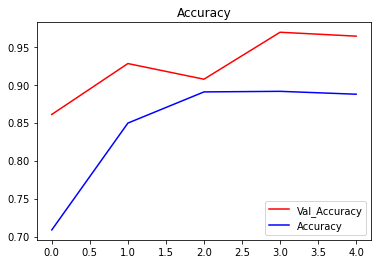

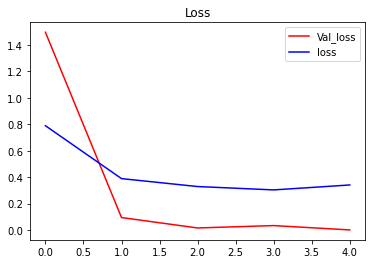

In [55]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, val_acc, 'r', acc, 'b')
plt.title('Accuracy')
plt.legend(('Val_Accuracy', 'Accuracy'),loc='lower right')
plt.figure()

plt.plot(epochs, val_loss, 'r', loss, 'b')
plt.title('Loss')
plt.legend(('Val_loss','loss'))

plt.show()